# Where can Community Councils Construct New Recycling Receptacles in Aberdeen Based on Accesibility to Bus Facilities and Core Paths?

* **Authors:** Sarah Collingsworth

* **Student ID:** 220009965

* **Date:** 11 December, 2024

**Abstract:**

Recycling is incredibly important for sustianable waste management practices, but Aberdeen, Scotland has a limited number of recycling points and centres. This study aims to find suitable areas for new recycling infrastrucure based on accessibility to bus facilities and public transport using spatial analysis with QGIS. Recycling infrastrucure needs to focus on accessibility and relevance within social norms to create significant positive change in recycling behaviours.

**Keywords:** Recycling, Aberdeen, Accessibility, Waste management

# GitHub Repository
- **GitHub Link:** [Add here the link to your repo]

## Declaration

> In submitting this assignment, I hereby confirm that I have read the University's statement on Good Academic Practice. The following work is my own. Significant academic debts and borrowings have been properly acknowledged and referenced.


**Table of Contents:**

* Introduction
* Methodology
  * Data and study area
  * Creating criteria for data analysis
  * Creating a suitability index
* Results
* Discussion
* Conclusions
* Appendix
* Reference List


## 1. Introduction

Waste management is an incredibly important tool for both society and the environment, and recycling is a very powerful waste management strategy to incorporate industrial ecology into our daily lives and reduce our environmental impact. However, recycling is not the most widely used waste management tool in the United Kingdom, and recycling rates need to improve to keep up with modern waste production.

There is evidence to prove that waste production will continue to increase due to population growth, and as a result, resource exploitation and consumption will continue to increase as well (Ceschi et al., 2021). The 2019 World Bank report suggests that the rate of urban waste production is growing faster than rates of urbanization, and researchers predict that, by 2025, cities will be housing more than 1.4 billion people globally with each person doubling the 2021 production rate of average solid waste (Ceschi et al., 2021). Scotland had a mean recycling rate of only 42.44% between 2015 and 2022, and while 42.44% is still a large proportion of waste being recycled, it is not enough to maintain sustainable waste management with growing populations and waste production. (UK Department for Environment, Food & Rural Affairs, 2024). Plastic, in particular, is a major contributor to waste with about 50% of plastic products being created for single use purposes, and most plastics are durable enough to last for decades, centuries, or even millennia before degrading (Hopewell, Dvorak and Kosior, 2009). Plastic degradation is also dependent on a number of physical factors including ultraviolet light exposure, oxygen, and temperature, and biodegradable plastics are dependent on suitable microorganisms, making recycling an incredibly important strategy for waste management for plastics (Hopewell, Dvorak and Kosior, 2009).

In 2020, the UK generated 191.2 million tonnes of total waste with a recycling rate of 44.5% (UK Department for Environment, Food & Rural Affairs, 2024). While not every good produced is made of recyclable material, we are not reaching our full recycling potential. In 2018 in the United States, only 50.4% of aluminum beer and soft drink cans were recycled, so nearly half of all aluminum cans that could have been recycled are now instead in landfills (Environmental Protection Agency, 2024). Although the United States has a slightly lower national recycling rate, it is reasonable to assume similar proportions of recyclable waste going to landfills in the UK.

Accessibility is incredibly important in any environmental and waste management strategy. Researchers have also found that accessibility of public transport has a noticeable impact on aspects of public daily life and the environment (Saif, Zefreh and Torok, 2019). Similarly, studies show that people are more likely to recycle when receptacles are easily accessible, so this begs the question of where can we build more accessible recycling points to improve sustainable waste management (Derksen and Gartrell, 1993). This study aims to locate areas to build new recycling points in Aberdeen, the third most populous city in Scotland, based on accessibility to public transit and core paths using spatial data to conduct a multi-criteria evaluation.



## 2. Methodology

### 2.1. Data and Study Area
I collected all of my data from the Aberdeen City Council Open Spatial Data Portal. I used the Community Councils 2024 dataset, which shows the boundaries of community councils in Aberdeen as of 2024, and I used this data for both the boundary of my study area and to visualize the geographical distribution of recycling receptacles across community councils. I used the Recycling Points dataset, which provides points of recycling point locations within the Aberdeen City Council local authority area as of 2022. I also used the Recycling Centres dataset, which provides points of household waste and recycling centres within the Aberdeen City Council local authority area as of 2022. I used the Bus Facilities dataset for vector points of bus stopping infrastructure within Aberdeen. Lastly, I used the Core Paths 2009 dataset to map core paths, paths designed for the purpose of increasing accessibility of an area to the public.

### 2.2. Creating criteria for data analysis

To conduct a multi-criteria evaluation using QGIS software to determine where in Aberdeen to build new recycling receptacles, I created criteria for each dataset. For each dataset I underwent the following process. I rasterised the vector data, and I used the new raster to calculate the distance surface, assigning each pixel the value of its proximity to the raster data. To create fact 1 of each criterion, I created a raster that limits the distance away from the raster data, and I used 200 metres as the limiting distance for each criteria. For the pre-existing recycling receptacles vector data, limited the distance to only greater than 200 metres from the data, and for the bus facilities and core paths, I limited the distance to only less than 200 metres from the data. To create fact 2 of each criterion, I normalised the original distance rasters for each dataset to only include data that falls geographically between the study area boundary and the distance limit, rescaling each criterion raster into the same numeric range of [0,1] to make them comparable with each other. Finally, I created a new raster that multiplies the 200 metre distance raster by the normalised raster to create the criterion raster for each dataset.

### 2.3. Creating a suitability index
For the suitability index, the bus facilities and core paths criteria are factors to increase or decrease suitability based on proximity to the data, as closer proximity makes recycling more accessible and thus a more suitable construction location. The pre-existing recycling points and recycling centres are constraints to avoid construction in areas within a certain radius of pre-existing recycling receptacles. I combined the factors as a weighted sum, assigning a slightly heavier weight to bus facilities because it is more practical to hold one’s recycling on a bus than walking a long distance. Then, I multiplied the weighted sum by the constraints to produce an intersection of all criteria. Finally, I created new rasters based on varying levels of suitability.


In [12]:

%pip install rasterio fiona
import rasterio
import rasterio.plot
from rasterio.plot import show

from google.colab import drive
drive.mount('/content/drive')

#NOTE: remove any libraries that you didn't use so it shows you knew
# which ones to import specifically


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3. Results

Illustrate your findings organised, using clear and concise text, informative tables, and good visualizations. Explain the meaning and significance of your results, making connections to the research questions or any hypotheses outlined in the introduction.


### 3.1 Results of creating criteria for raster analysis

Figure 1 displays the criterion 1 constraint, a basis for limiting possibilities of suitability according to proximity to pre-existing recycling points.

**Figure 1:** Criterion 1 (recycling points).

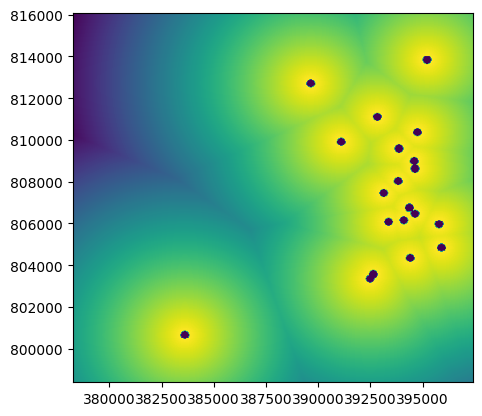

<Axes: >

In [13]:
recycling_points = '/content/drive/MyDrive/Colab Notebooks/GG3209_IRP/C1_REDO.tif'
c1 = rasterio.open(recycling_points)
show(c1)

Figure 2 displays the criterion 2 factor, a basis for the increases or decreases of suitability according to proximity to bus facilities.

**Figure 2:** Criterion 2 (bus facilities).

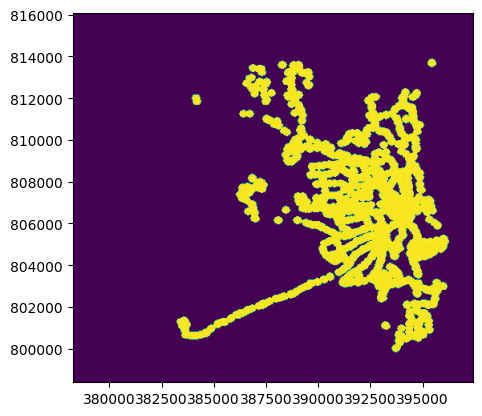

<Axes: >

In [14]:
bus = '/content/drive/MyDrive/Colab Notebooks/GG3209_IRP/C2_REDO.tif'
c2 = rasterio.open(bus)
show(c2)

Figure 3 displays the criterion 3 factor, a basis for the increases or decreases of suitability according to proximity to core paths.

**Figure 3:** Criterion 3 (core paths).

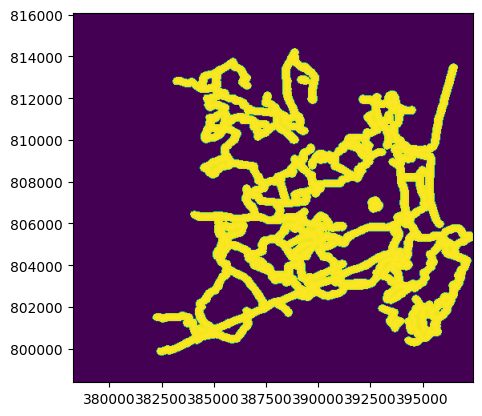

<Axes: >

In [15]:
core_paths = '/content/drive/MyDrive/Colab Notebooks/GG3209_IRP/C3_REDO.tif'
c3 = rasterio.open(core_paths)
show(c3)

Figure 4 displays the criterion 4 constraint, a basis for limiting possibilities of suitability according to proximity to pre-existing recycling centres.

**Figure 4:** Criterion 4 (recycling centres).

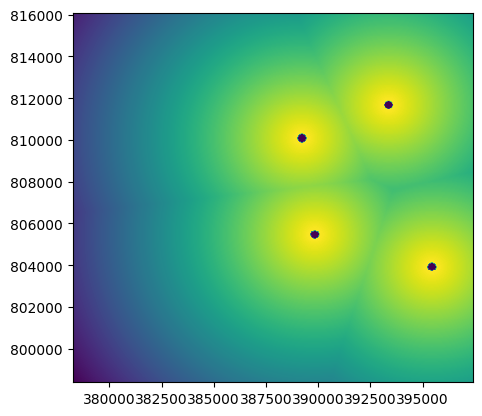

<Axes: >

In [16]:
recycling_centres = '/content/drive/MyDrive/Colab Notebooks/GG3209_IRP/C4.tif'
c4 = rasterio.open(recycling_centres)
show(c4)

### Results of creating a suitability index

The resulting suitability index (Figure 5) displays potential location for construction of new recycling receptacles. This index determines suitability based off of proximity to bus facilities and core paths, with bus facilities weighted at 60% and core paths weighted at 40%, only including areas within 200 metres from these factors, and the index assigns a value of 0% suitability to any area within a 200 metre diameter of pre-existing recycling points and recycling centres. With these limitations, the suitability index displays only areas that are easily accessible to the public, increasing accessibility of recycling in Aberdeen.


**Figure 5:** Suitability of locations to build new recycling receptacles in Aberdeen based on accesibility to bus facilities and core paths with yellow representing most suitable locations and dark purple representing least suitable locations.

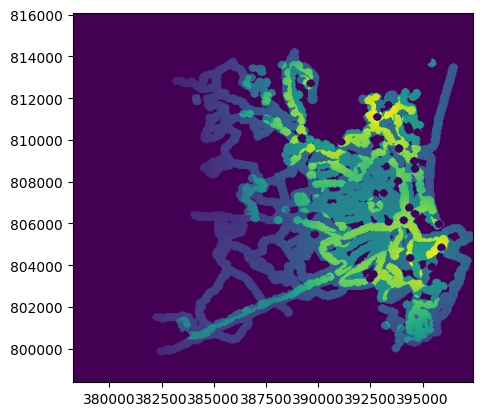

<Axes: >

In [17]:
suit_raster = '/content/drive/MyDrive/Colab Notebooks/GG3209_IRP/Suitabilityindex_REDO.tif'
suitability = rasterio.open(suit_raster)
show(suitability)

Figure 6 displays only areas with greater than 90% suitability in Aberdeen. The highlighted locations should be prioritized for new recycling locations, but there is a very limited amount of space that constitutes the prioritized area. Ideally, the city of Aberdeen would construct more than just the few new recycling receptacles that would fit in this area, for the greater number of recycling points and centres there are, the more accessible recycling becomes. Therefore, I also created a raster that displays areas with greater than 80% suitability in Aberdeen (Figure 7). Although the areas of greater than 90% suitability should be prioritized, recognizing areas of greater than 80% suitability gives the council more options for construction locations if the prioritized areas either fill up or run into unexpected land use conflicts.


**Figure 6:** Raster layer of areas with a suitability index of 90% or greater, represented by the yellow areas.

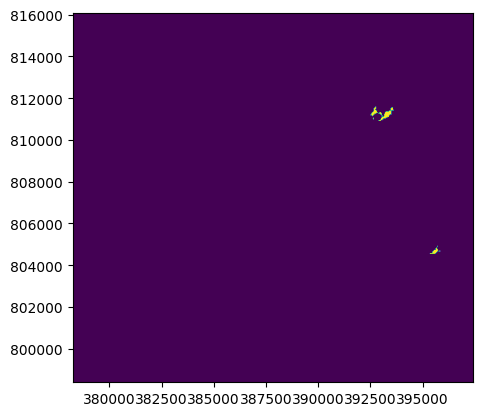

<Axes: >

In [ ]:
suit_90 = '/content/drive/MyDrive/Colab Notebooks/GG3209_IRP/Suitability90.tif'
best_suitability = rasterio.open(suit_90)
show(best_suitability)

**Figure 7:** Raster layer of areas with a suitability index of 80% or greater, represented by the yellow areas.

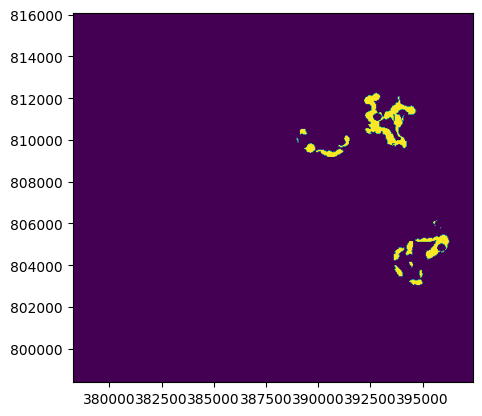

<Axes: >

In [ ]:
suit_80 = '/content/drive/MyDrive/Colab Notebooks/GG3209_IRP/Suitability80.tif'
sec_best_suitability = rasterio.open(suit_80)
show(sec_best_suitability)

Figure 8 displays an open street map of Aberdeen with rasters showing Aberdeen community councils boundaries, locations with greater than 90% suitability, and locations with greater than 80% suitability to better visualise potential locations for new recycling construction.


**Figure 8:** Open street map of Aberdeen with community council boundaries (pictured in blue), areas of greater than 80% suitability (pictured in orange), and areas of greater than 90% suitability (pictured in red).

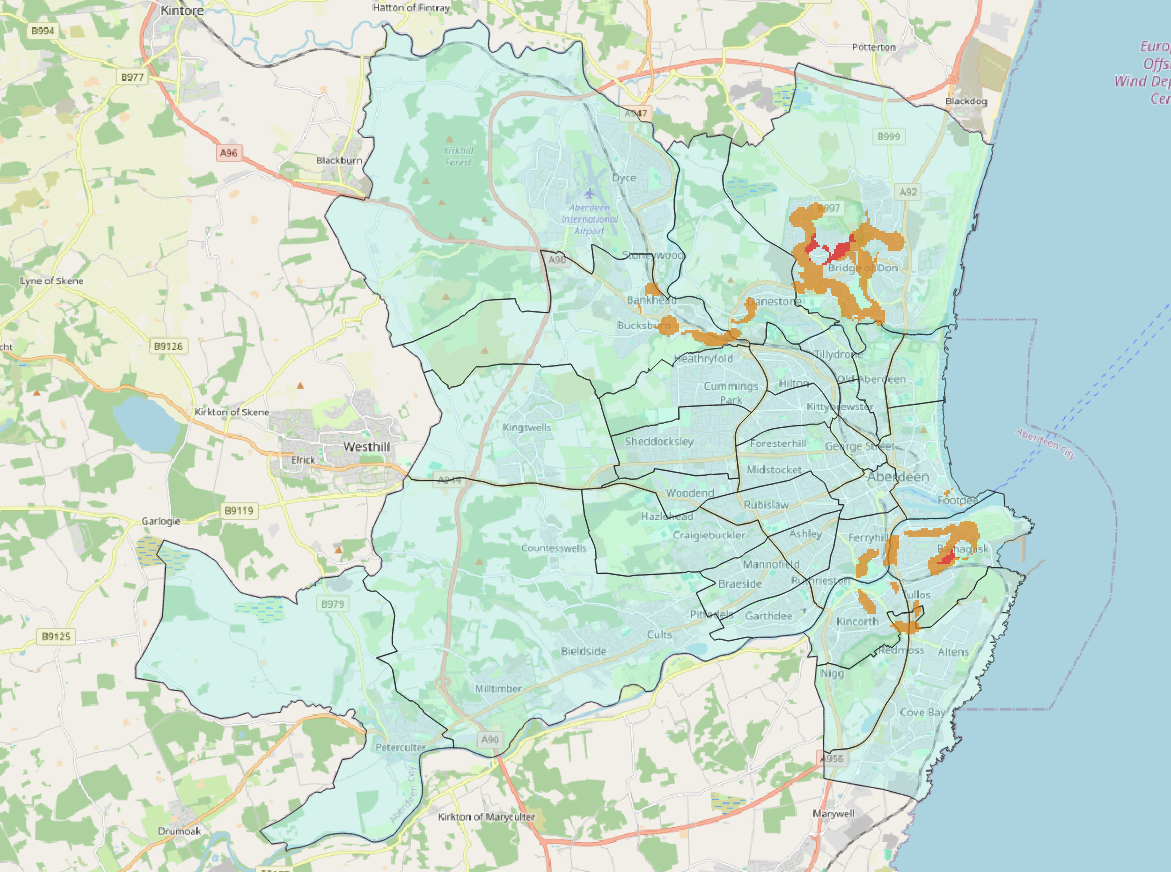

## 4. Discussion
Based on open street map and suitability data, I suggest that the first construction location should take place in Bridge of Don near the street intersection of Jesmond Drive and Whitestripes avenue. This specific intersection is in a slightly more commercial area, therefore not impacting the aesthetic value of neighbourhoods, but the area is surrounded by residential areas, meaning the location would still allow for easy access for residents. This specific location is also located in an area of greater than 90% suitability that is also surrounded by large areas of greater than 80% suitability, meaning that both the immediate and surrounding areas are easily accessible to the public. Research shows that intervention of any kind can increase recycling rates over baseline levels, so we need to make sure that construction of new recycling receptacles are paired with sufficient incentives to maximize results (Derksen and Gartrell, 1993).

Many studies have looked into the reasonings and motivations behind recycling behaviours, and the most common finding is that recycling is viewed as a primarily social behaviour. Social norms have been found to have the biggest influence of any incentive to promote recycling in a community (Ramayah, Lee and Lim, 2012). Individual waste management, specifically in the form of recycling, is an observable behaviour, and psychological aspects of human behaviour and societal norms suggest that humans will copy behaviour that they observe from other humans (Ceschi et al., 2021). Therefore, constructing new recycling locations in public areas will incentivise more people to recycle, developing more sustainable waste management for the community. The dichotomy of building new recycling receptacles in intersections of commercial and residential areas allows for maximum social influence on improving recycling behaviours, making my suggested location an ideal candidate for construction.

Research also shows that people who recycle tend to be more knowledgeable about recycling than non-recyclers, despite having equally strong beliefs on how recycling benefits the environment (Derksen and Gartrell, 1993). Surveys looking at various concern levels for the environment found that about 90% of respondents fall within the highest level of concern for environmental issues, so it is reasonable to assume that most people already have an understanding of the importance of recycling (Derksen and Gartrell, 1993). Therefore, we need to change the topic of conversation. The *how* of recycling needs to be promoted over the *why* of recycling alongside this new construction. Recycling needs to be both easily accessible and easily understandable, for the details on what one can and cannot recycle can be confusing and vary depending on the recycling location.

I also suggest that some of the newly constructed recycling points be designated for textile waste. Large portions of textile waste end up in landfills in the UK due to the difficulty and complexity of fiber reprocessing, but there are other ways to reuse and recycle textile waste without fiber reprocessing, helping the waste stay out of landfills (Bartl, 2011). Textile waste can be donated or recycled to use for other goods, particularly fiber arts goods like blankets or even stuffing.

One of this study’s limitations, however, is that it does not take into account neighbourhoods that are completely lacking in recycling methods. For example, the Torry neighbourhood already has 2 recycling points and 1 recycling centre, as shown in Table 1, but suitability results still favor Torry as a location for new construction over other areas with no pre-existing recycling infrastructure. In fact, the two most populous neighbourhoods in Aberdeen (Braeside, Mannofield, Broomhill & Seafield and Cults, Bieldside & Milltimber) do not have any recycling infrastructure and do not contain any of the proposed construction areas. Further research could address this issue by conducting this process in a study area of Aberdeen neighbourhoods only without current recycling infrastructure.

Furthermore, this study does not take into account land use, which could negatively impact the amount of space suitable for construction. Although recycling points are small, private property could restrict the amount of land available for new recycling points and centres. This issue could be solved by, alongside the multi-criteria evaluation, using supervised classification methods to identify land uses, such as houses, that need to be considered as a constraint for the study.



## 5. Conclusion

Recycling is an incredibly useful and sustainable waste management tool to reduce our environmental impacts in times of rising populations and waste production rates. Aberdeen lacks a sufficient number of recycling receptacles, and by constructing more recycling infrastructure, residents are given more opportunities to recycle in their daily life. However, new recycling infrastructure needs to be both accessible and understandable to create a significant positive increase in recycling behaviour. As a result, new recycling infrastructure should be built with consideration to various methods of widely-used public transport like buses and core paths. Recycling receptacles should also vary in types of waste collected in order to reduce waste in various forms, like plastic waste recycling versus textile waste recycling. I have used spatial analysis with QGIS to find areas of sufficient suitability for new recycling receptacles based on accessibility to bus facilities and core paths, but further research is needed for more accurate locations of possible new infrastructure that takes into account population, a neighbourhood’s number of pre-existing recycling infrastructure, and land use.



## 6. Appendix

**Table 1:** Number of recycling points, number of recycling centres, number of total recycling receptacles, and population in each Aberdeen neighbourhood.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GG3209_IRP/RecyclingData_Python.csv")
print(df)


                                 Neighbourhood  Recycling_Points  \
0                     Kincorth, Leggart & Nigg                 0   
1                                        Torry                 2   
2                                    Oldmachar                 1   
3                                    Hazlehead                 0   
4   Braeside, Mannofield, Broomhill & Seafield                 0   
5                         Balgownie & Donmouth                 1   
6                                      Hanover                 2   
7                                     Woodside                 0   
8                                    Ferryhill                 0   
9                                     West End                 0   
10                                    Garthdee                 2   
11                                  Northfield                 0   
12                                  Summerhill                 0   
13                                      Seaton  

## 7. Reference List

Aberdeen City Council (2020) 2019 Mid Year Population Estimates - Neighbourhoods. Available at:https://www.aberdeencity.gov.uk/services/strategy-performance-and-statistics/statistics-and-information/population (Accessed: 7 December, 2024).

Aberdeen City Council Open Spatial Data Portal (2022) Bus Facilities. Available at: https://spatialdata-accabdn.opendata.arcgis.com/datasets/057e4927767a4d20b56fbd05a4f89eac_0/explore (Accessed: 1 December, 2024).

Aberdeen City Council Open Spatial Data Portal (2024) Community Councils 2024. Available at: https://spatialdata-accabdn.opendata.arcgis.com/datasets/83292e40da114456a70e9ee47809ab4f_74/explore (Accessed: 1 December, 2024).

Aberdeen City Council Open Spatial Data Portal (2021) Core Paths 2009. Available at: https://spatialdata-accabdn.opendata.arcgis.com/datasets/9023585537964295bc5a122374afc2d6_0/explore (Accessed: 1 December, 2024).

Aberdeen City Council Open Spatial Data Portal (2023) Neighbourhoods. Available at: https://spatialdata-accabdn.opendata.arcgis.com/datasets/ccd6334d322f46468c8ddf12b26e64e6_81/explore (Accessed: 1 December, 2024).

Aberdeen City Council Open Spatial Data Portal (2022) Recycling Centres. Available at: https://spatialdata-accabdn.opendata.arcgis.com/datasets/5dbd92e1aba9467b8de058d0347a5b04_21/explore?location=57.159333%2C-2.131087%2C12.81 (Accessed: 1 December, 2024).

Aberdeen City Council Open Spatial Data Portal (2022) Recycling Points. Available at: https://spatialdata-accabdn.opendata.arcgis.com/datasets/906780e466904ae397d7162e6c0663b6_22/explore (Accessed: 1 December, 2024).

Bartl, A. (2011) ‘Chapter 12- Textile Waste’, Waste: A Handbook for Management, pp.167-179. Available at: https://doi.org/10.1016/B978-0-12-381475-3.10012-9 (Accessed 11 December, 2024).

Ceschi, A., Sartori, R., Dickert, S., Scalco, A., Tur, E., Tommasi, F., and Delfini, K. (2021) ‘Testing a norm-based policy for waste management: An agent-based modeling simulation on nudging recycling behavior’, Journal of Environmental Management, 294. Available at: https://doi.org/10.1016/j.jenvman.2021.112938 (Accessed: 7 December, 2024).

Derksen, L. and Gartrell, J. (1993) ‘The Social Context of Recycling’, American Sociological Review, 58(3), pp.434-442. Available at: https://www.jstor.org/stable/2095910 (Accessed: 10 December, 2024).

Environmental Protection Agency (2024) Frequent Questions regarding EPA’s Facts and Figures about Materials, Waste and Recycling. Available at: https://www.epa.gov/facts-and-figures-about-materials-waste-and-recycling/frequent-questions-regarding-epas-facts-and#Percentage (Accessed: 10 December, 2024).

Hopewell, J., Dvorak, R., and Kosior, E. (2009) ‘Plastics recycling: challenges and opportunities’, Philosophical Transactions of the Royal Society B, 364(1,526). Available at: https://doi.org/10.1098/rstb.2008.0311 (Accessed: 10 December, 2024).

Ramayah, T., Lee, J., and Lim, S. (2012) ‘Sustaining the environment through recycling: An empirical study’, Journal of Environmental Management, 102, pp.141-147. Available at: https://doi.org/10.1016/j.jenvman.2012.02.025 (Accessed: 10 December, 2024).

Saif, M., Zefreh, M., and Torok, A. (2019) ‘Public Transportation Accessibility: A Literature Review’, Periodica Polytechnica Transportation Engineering, 47. Available at: https://doi.org/10.3311/PPtr.12072 (Accessed: 7 December, 2024).

UK Department for Environment, Food & Rural Affairs (2024) UK statistics on waste. Available at: https://www.gov.uk/government/statistics/uk-waste-data/uk-statistics-on-waste (Accessed: 10 December, 2024).



